In [1]:
%pylab inline
import random

import numpy as np
import random
import pickle
from tqdm import tqdm
import letor_metrics

Populating the interactive namespace from numpy and matplotlib


In [2]:
# raw_data = np.loadtxt('./data/ml-1m/ratings.dat', delimiter='::')

In [3]:
# from dataset import TripletsDataset

In [4]:
# ds = TripletsDataset(raw_data, threshold_user=60, rnd_seed=42)
# ds.train_test_split(n_train=50)

In [5]:
# pickle.dump(ds, open('./tmp/ds_rank.pkl', 'wb'))
ds = pickle.load(open('./tmp/ds.pkl', 'rb'))

In [6]:
ds.init_cached_random()

# define model

In [7]:
import tensorflow as tf
import ranknn
import imp

import tensorflow.contrib.slim as slim

In [8]:
imp.reload(ranknn)

<module 'ranknn' from '/Users/mikhail/std/repos/nnmf/ranknn.py'>

In [137]:
model.destroy()

In [138]:
N_USERS = 6041 #int(max(raw_data[:, 0])) + 1
N_ITEMS = 3953 #int(max(raw_data[:, 1])) + 1
N_EMBEDDINGS = 5

In [139]:
def inner_network(user_emb, item_emb_left, item_emb_right):
    joined_input = tf.concat(1, [user_emb, item_emb_left, item_emb_right])
    net = slim.fully_connected(inputs=joined_input, num_outputs=32, activation_fn=tf.nn.tanh)
    net = slim.fully_connected(inputs=net, num_outputs=16, activation_fn=tf.nn.tanh)
#     net = slim.fully_connected(inputs=net, num_outputs=64, activation_fn=tf.nn.relu)
    net = slim.fully_connected(inputs=net, num_outputs=1, activation_fn=None)
    return net

In [140]:
model = ranknn.RANK_NN(N_USERS, N_ITEMS, N_EMBEDDINGS, alpha=0.1, beta=1.0, alpha_reg=0.0, inner_net=inner_network)
model.build_graph()
model.initialize_session()

In [153]:
# losses = []
batch_size = 512
for n_batches, cur_optim in [(3000, model.trainer_3), (3000, model.trainer_3)]:
    for i in tqdm(range(n_batches)):
        batch = ds.sample_train_batch(n_samples=batch_size)
        fd = {
            model.user_ids:  batch['users'], 
            model.left_ids:  batch['left_items'],
            model.right_ids: batch['right_items'],
            model.target_y:  batch['y'],
        }
        el, nl, reg, t, m, _ = model.session.run(
            [
                model.embedding_loss, 
                model.net_loss, 
                model.regularization, 
                model.target, 
                model.net_margins, 
                cur_optim
            ], 
            feed_dict=fd
        )
        hitrate = np.mean((m>0) == (batch['y']>0))
        losses.append((el, nl, reg, t, hitrate))
        if i%500==0:
            user_norm = np.linalg.norm(model.weights_u)
            item_norm = np.linalg.norm(model.weights_i)
            print('[it {}] weight norms, users: {}, items: {}'.format(i, user_norm, item_norm))
            print('[it {}] metrics (emb_loss, net_loss, reg, target, hr): {}'.format(i, losses[-1]))

  0%|          | 8/3000 [00:00<00:42, 69.93it/s]

[it 0] weight norms, users: 112.7284927368164, items: 147.66213989257812
[it 0] metrics (emb_loss, net_loss, reg, target, hr): (0.43000406, 0.33777231, 12.625096, 0.38077271, 0.83984375)


 17%|█▋        | 517/3000 [00:03<00:18, 137.18it/s]

[it 500] weight norms, users: 112.89954376220703, items: 147.72178649902344
[it 500] metrics (emb_loss, net_loss, reg, target, hr): (0.40446806, 0.34279212, 12.252331, 0.38323894, 0.853515625)


 34%|███▍      | 1021/3000 [00:07<00:14, 133.90it/s]

[it 1000] weight norms, users: 113.0478744506836, items: 147.80865478515625
[it 1000] metrics (emb_loss, net_loss, reg, target, hr): (0.40530473, 0.33434707, 12.294188, 0.37487754, 0.853515625)


 51%|█████     | 1524/3000 [00:11<00:11, 132.81it/s]

[it 1500] weight norms, users: 113.14913940429688, items: 147.8690948486328
[it 1500] metrics (emb_loss, net_loss, reg, target, hr): (0.40966672, 0.32553065, 12.814828, 0.36649731, 0.84765625)


 68%|██████▊   | 2028/3000 [00:15<00:07, 134.01it/s]

[it 2000] weight norms, users: 113.26321411132812, items: 147.92088317871094
[it 2000] metrics (emb_loss, net_loss, reg, target, hr): (0.38336322, 0.30379087, 12.119209, 0.3421272, 0.86328125)


 84%|████████▍ | 2516/3000 [00:18<00:03, 134.54it/s]

[it 2500] weight norms, users: 113.38545227050781, items: 147.9624786376953
[it 2500] metrics (emb_loss, net_loss, reg, target, hr): (0.39873359, 0.32299191, 12.470431, 0.36286527, 0.85546875)


  1%|          | 26/3000 [00:00<00:24, 119.81it/s]

[it 0] weight norms, users: 113.4898681640625, items: 148.01036071777344
[it 0] metrics (emb_loss, net_loss, reg, target, hr): (0.44922173, 0.30856645, 12.655931, 0.35348862, 0.853515625)


 17%|█▋        | 524/3000 [00:04<00:18, 133.66it/s]

[it 500] weight norms, users: 113.60368347167969, items: 148.05880737304688
[it 500] metrics (emb_loss, net_loss, reg, target, hr): (0.36634439, 0.27866501, 12.298971, 0.31529945, 0.888671875)


 34%|███▍      | 1028/3000 [00:08<00:14, 132.69it/s]

[it 1000] weight norms, users: 113.72374725341797, items: 148.1063995361328
[it 1000] metrics (emb_loss, net_loss, reg, target, hr): (0.43553224, 0.32337916, 12.379796, 0.36693239, 0.849609375)


 51%|█████     | 1518/3000 [00:11<00:11, 132.07it/s]

[it 1500] weight norms, users: 113.87969207763672, items: 148.14926147460938
[it 1500] metrics (emb_loss, net_loss, reg, target, hr): (0.45166674, 0.31629023, 12.540597, 0.3614569, 0.849609375)


 67%|██████▋   | 2023/3000 [00:16<00:07, 128.85it/s]

[it 2000] weight norms, users: 114.00563049316406, items: 148.18968200683594
[it 2000] metrics (emb_loss, net_loss, reg, target, hr): (0.38866878, 0.27226478, 12.348884, 0.31113166, 0.876953125)


 84%|████████▍ | 2521/3000 [00:21<00:04, 109.50it/s]

[it 2500] weight norms, users: 114.1119384765625, items: 148.25112915039062
[it 2500] metrics (emb_loss, net_loss, reg, target, hr): (0.38003042, 0.28855532, 12.478168, 0.32655835, 0.869140625)


100%|██████████| 3000/3000 [00:25<00:00, 118.00it/s]


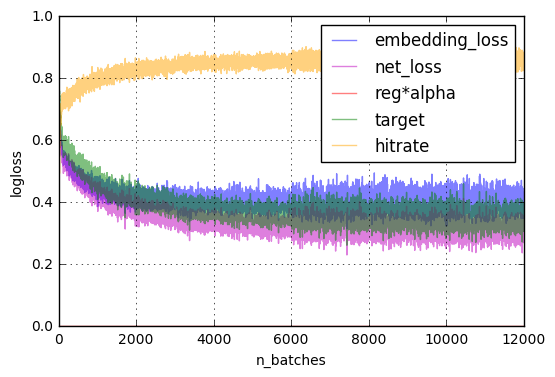

In [154]:
plot([x[0] for x in losses], c='b', label='embedding_loss', alpha=0.5)
plot([x[1] for x in losses], c='m', label='net_loss', alpha=0.5)
plot([x[2]*model.alpha_reg for x in losses], c='r', label='reg*alpha', alpha=0.5)
plot([x[3] for x in losses], c='g', label='target', alpha=0.5)
plot([x[4] for x in losses], c='orange', label='hitrate', alpha=0.5)
grid()
legend()
xlabel('n_batches')
ylabel('logloss')

In [155]:
# second approach

In [156]:
from itertools import product
from heapq import nlargest
import functools

In [161]:
def get_topk(u, batch_mode=True, out='net'):
    ids = [k for k, v in ds.test[u]]
    if batch_mode:
        # batch mode == generate all pair, predict them at once and use for extract top-k
        ij_list = np.array(list(product(ids, ids))).astype(np.int32)
        fd = {
            model.user_ids: np.array([u]*len(ij_list)).astype(np.int32),
            model.left_ids: ij_list[:, 0],
            model.right_ids: ij_list[:, 1]
        }
        if out=='net':
            result = model.session.run(model.net_margins, feed_dict=fd)
        else:
            result = model.session.run(model.embedding_margins, feed_dict=fd)
        comp_mat = np.sign(result.reshape(len(ids), len(ids))).astype(np.byte)
        def comparator(x, y):
            return comp_mat[y, x]
    else:
        # non-batch mode: ask about pair every time it needed
        def comparator(x, y):
            fd = {
                model.user_ids: np.array([u]).astype(np.int32),
                model.left_ids: np.array([ids[x]]).astype(np.int32),
                model.right_ids: np.array([ids[y]]).astype(np.int32),
            }
            
            if out=='net':
                result = model.session.run(model.net_margins, feed_dict=fd)[0]
            else:
                result = model.session.run(model.embedding_margins, feed_dict=fd)[0]
            return np.sign(-result)
    
    ratings = [v for k, v in ds.test[u]]       
    return(nlargest(10, ratings, key=functools.cmp_to_key(comparator)))

In [162]:
%%time
u = 5
y_true = np.array([v for k, v in ds.test[u][:10]])
y_pred = np.array(get_topk(u, batch_mode=True, out='net'))
print(letor_metrics.ndcg_score_from_raw(y_true, y_pred))

0.0322580645161
CPU times: user 37 ms, sys: 26.3 ms, total: 63.3 ms
Wall time: 52.2 ms


In [163]:
ndcg_vals = []
ndcg_hist =[]
out_signal = 'net'
for u in tqdm(ds.data_keys[:100], desc='Prediction', leave=True):
    y_true = np.array([v for k, v in ds.test[u][:10]])
#     if len(ds.test[u]) < 300:
    y_pred = np.array(get_topk(u, batch_mode=True, out=out_signal))
#     else:
#     y_pred = np.array(get_topk(u, batch_mode=False, out=out_signal))
    gain = letor_metrics.ndcg_score_from_raw(y_true, y_pred)
    ndcg_vals.append(gain)

Prediction: 100%|██████████| 100/100 [00:04<00:00, 20.69it/s]


In [165]:
np.mean(ndcg_vals)

0.5629913124407756